Business problem to solve:
"We're losing money in some areas but we don't know exactly where or why. We need answers."
________________________________________
Your 6 Business Questions to Solve:
1. Which product categories and sub-categories are generating the most profit — and which ones are actually losing us money despite high sales?
2. Are our discounts helping us sell more or are they destroying our profit margins?
3. Which regions and states are our strongest markets — and which ones should we be worried about?
4. Who are our most valuable customers and what segment drives the most revenue?
5. Are there seasonal patterns in our sales — which months or quarters are peak and which are slow?
6. What is our overall business health — total revenue, total profit, profit margin, and how is it trending over time?


# Part 1 — SQL

In [112]:
import sqlite3

In [177]:
conn=sqlite3.connect("Super_Store_sales.db")
df = pd.read_csv("/content/superstore_cleaned.csv", encoding="latin1")
df.to_sql(
    name="Super_store_sales",
    con=conn,
    if_exists="replace",
    index=False)


9994

In [178]:
query ="""SELECT name
FROM sqlite_master
WHERE type='table';"""
result=pd.read_sql_query(query,conn)
result

,name
0,Super_store_sales


In [179]:
query="""
select * from Super_store_sales limit 5"""
top5=pd.read_sql_query(query,conn)
top5

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Month Name,Quarter
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,November,4
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,November,4
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,June,2
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,October,4
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,October,4


query="""





"""
x=pd.read_sql_query(query,conn)
x

In [180]:
query="""
select sum(sales) as total_sales,sum(profit) as total_profit, sum(profit)/sum(sales)* 100 as Total_profit_margin
from Super_store_sales;
"""
overview=pd.read_sql_query(query,conn)
overview

,total_sales,total_profit,Total_profit_margin
0,2.297201e+06,286397.0217,12.467217


In [181]:
query="""
select category,sum(sales) as total_sales,sum(profit) as total_profit, sum(profit)/sum(sales)* 100 as Total_profit_margin
from Super_store_sales
group by category
order by Total_profit_margin desc;


"""
Category_performance=pd.read_sql_query(query,conn)
Category_performance

,Category,total_sales,total_profit,Total_profit_margin
0,Technology,836154.0330,145454.9481,17.395712
1,Office Supplies,719047.0320,122490.8008,17.035158
2,Furniture,741999.7953,18451.2728,2.486695


In [182]:
query="""
select "sub-category",sum(sales) as total_sales,sum(profit) as total_profit, sum(profit)/sum(sales)* 100 as Total_profit_margin
from Super_store_sales
group by "sub-category"
order by Total_profit_margin desc;


"""
sub_Category_performance=pd.read_sql_query(query,conn)
sub_Category_performance

,Sub-Category,total_sales,total_profit,Total_profit_margin
0,Labels,12486.3120,5546.2540,44.418672
1,Paper,78479.2060,34053.5693,43.391837
2,Envelopes,16476.4020,6964.1767,42.267582
3,Copiers,149528.0300,55617.8249,37.195585
4,Fasteners,3024.2800,949.5182,31.396504
5,Accessories,167380.3180,41936.6357,25.054700
6,Art,27118.7920,6527.7870,24.071083
7,Appliances,107532.1610,18138.0054,16.867517
8,Binders,203412.7330,30221.7633,14.857361
9,Furnishings,91705.1640,13059.1436,14.240358


In [183]:
query="""
select discount,avg(profit) as Avg_profit
from Super_store_sales
group by discount
order by discount ;


"""
Discount_Impact=pd.read_sql_query(query,conn)
Discount_Impact

,Discount,Avg_profit
0,0.00,66.900292
1,0.10,96.055074
2,0.15,27.288298
3,0.20,24.702572
4,0.30,-45.679636
5,0.32,-88.560656
6,0.40,-111.927429
7,0.45,-226.646464
8,0.50,-310.703456
9,0.60,-43.077212


In [184]:
query ="""
SELECT Region, SUM(Sales), SUM(Profit), sum(profit)/sum(sales)* 100 as Total_profit_margin
from Super_store_sales
GROUP BY Region
ORDER BY Total_profit_margin desc
"""
regional_performance=pd.read_sql_query(query,conn)
regional_performance

,Region,SUM(Sales),SUM(Profit),Total_profit_margin
0,West,725457.8245,108418.4489,14.944831
1,East,678781.2400,91522.7800,13.483399
2,South,391721.9050,46749.4303,11.934342
3,Central,501239.8908,39706.3625,7.921629


In [185]:
query ="""
SELECT Segment, SUM(Sales), SUM(Profit), sum(profit)/sum(sales)* 100 as Total_profit_margin
from Super_store_sales
GROUP BY segment
ORDER BY Total_profit_margin desc
"""
segment_performance=pd.read_sql_query(query,conn)
segment_performance

,Segment,SUM(Sales),SUM(Profit),Total_profit_margin
0,Home Office,4.296531e+05,60298.6785,14.034269
1,Corporate,7.061464e+05,91979.1340,13.025506
2,Consumer,1.161401e+06,134119.2092,11.548050


In [186]:
query ="""
SELECT strftime('%Y',[order date]) as year, SUM(Sales), SUM(Profit), sum(profit)/sum(sales)* 100 as Total_profit_margin
from Super_store_sales
GROUP BY year
ORDER BY year desc
"""
year_performance=pd.read_sql_query(query,conn)
year_performance

,year,SUM(Sales),SUM(Profit),Total_profit_margin
0,2017,733215.2552,93439.2696,12.743771
1,2016,609205.5980,81795.1743,13.426530
2,2015,470532.5090,61618.6037,13.095504
3,2014,484247.4981,49543.9741,10.231126


In [189]:
query="""
select "customer id" ,sum(profit) as profit
from Super_store_sales
group by "customer id"
order by profit desc
limit 5;"""
Top5_performance=pd.read_sql_query(query,conn)
Top5_performance

,Customer ID,profit
0,TC-20980,8981.3239
1,RB-19360,6976.0959
2,SC-20095,5757.4119
3,HL-15040,5622.4292
4,AB-10105,5444.8055


In [123]:
conn.close()

Python analysis

In [124]:
import matplotlib.pyplot as plt
import numpy as np

In [125]:
import pandas as pd
df = pd.read_csv("/content/Superstore_raw.csv", encoding="latin1")
df.shape
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [126]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
print (df['Order Date'].head(15))


0    2016-11-08
1    2016-11-08
2    2016-06-12
3    2015-10-11
4    2015-10-11
5    2014-06-09
6    2014-06-09
7    2014-06-09
8    2014-06-09
9    2014-06-09
10   2014-06-09
11   2014-06-09
12   2017-04-15
13   2016-12-05
14   2015-11-22
Name: Order Date, dtype: datetime64[ns]


In [127]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month Name'] = df['Order Date'].dt.strftime('%B')
df['Quarter'] = df['Order Date'].dt.quarter

In [128]:
print(df[['Order Date', 'Ship Date', 'Year', 'Month Name', 'Quarter']].head())

  Order Date  Ship Date  Year Month Name  Quarter
0 2016-11-08 2016-11-11  2016   November        4
1 2016-11-08 2016-11-11  2016   November        4
2 2016-06-12 2016-06-16  2016       June        2
3 2015-10-11 2015-10-18  2015    October        4
4 2015-10-11 2015-10-18  2015    October        4


In [129]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [130]:
print(df['Category'].unique())
print(df['Region'].unique())
print(df['Segment'].unique())
print(df['Year'].unique())

['Furniture' 'Office Supplies' 'Technology']
['South' 'West' 'Central' 'East']
['Consumer' 'Corporate' 'Home Office']
[2016 2015 2014 2017]


In [131]:
total_sales = df['Sales'].sum()
print("total sales =",total_sales)

total sales = 2297200.8603000003


In [132]:
total_profit = df['Profit'].sum()
print("total profit =",total_profit)

total profit = 286397.0217


In [133]:
Total_Profit_Margin=(total_profit/total_sales)* 100
print('Total_Profit_Margin=',Total_Profit_Margin)

Total_Profit_Margin= 12.467217240315604


In [134]:
ALL_categories =(df['Category'].unique())
ALL_categories

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [135]:
ALL_Subcategories =(df['Sub-Category'].unique())
ALL_Subcategories

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [136]:
total_Sales_category= df.groupby('Category')[['Sales','Profit']].sum()
total_Sales_category

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


In [137]:
total_Sales_category= df.groupby('Category')[['Sales','Profit']].sum()
total_Sales_category['total_margin']=total_Sales_category['Profit']/total_Sales_category['Sales']*100

total_Sales_category

,Sales,Profit,total_margin
Category,,,
Furniture,741999.7953,18451.2728,2.486695
Office Supplies,719047.0320,122490.8008,17.035158
Technology,836154.0330,145454.9481,17.395712


In [138]:
total_Sales_Subcategory= df.groupby('Sub-Category')[['Sales','Profit']].sum()
total_Sales_Subcategory['total_margin']=total_Sales_Subcategory['Profit']/total_Sales_Subcategory['Sales']*100
total_Sales_Subcategory

,Sales,Profit,total_margin
Sub-Category,,,
Accessories,167380.3180,41936.6357,25.054700
Appliances,107532.1610,18138.0054,16.867517
Art,27118.7920,6527.7870,24.071083
Binders,203412.7330,30221.7633,14.857361
Bookcases,114879.9963,-3472.5560,-3.022768
Chairs,328449.1030,26590.1663,8.095673
Copiers,149528.0300,55617.8249,37.195585
Envelopes,16476.4020,6964.1767,42.267582
Fasteners,3024.2800,949.5182,31.396504


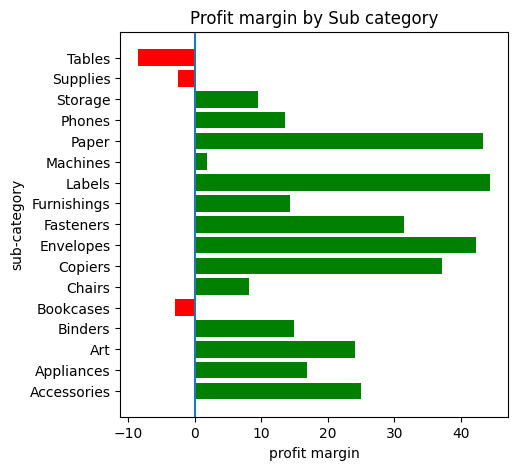

In [139]:
plt.figure(figsize=(5,5))

colors=[]
for value in total_Sales_Subcategory['total_margin']:
  if value < 0:
    colors.append('red')
  else:
    colors.append('green')
plt.axvline(x=0)
plt.barh(total_Sales_Subcategory.index,total_Sales_Subcategory['total_margin'],color=colors)
plt.title("Profit margin by Sub category")
plt.ylabel("sub-category")
plt.xlabel("profit margin")
plt.show()


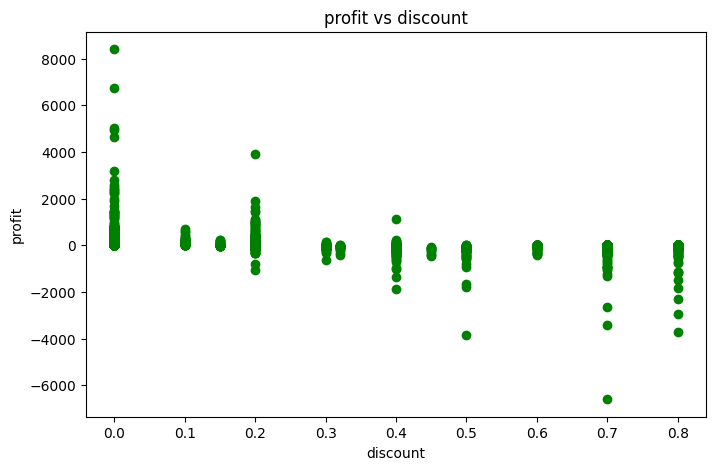

In [140]:
plt.figure(figsize=(8,5))
plt.scatter(df['Discount'],df['Profit'],color ='green')

plt.title("profit vs discount")
plt.xlabel("discount")
plt.ylabel("profit")

plt.show()


In [141]:
discount_level= df.groupby('Discount')[['Profit']].mean()
discount_level

,Profit
Discount,
0.00,66.900292
0.10,96.055074
0.15,27.288298
0.20,24.702572
0.30,-45.679636
0.32,-88.560656
0.40,-111.927429
0.45,-226.646464
0.50,-310.703456


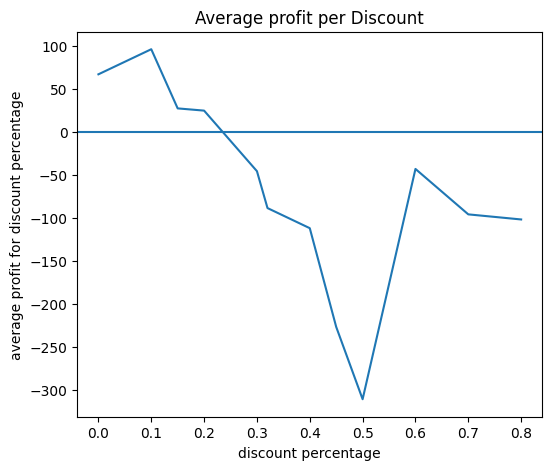

In [142]:
plt.figure(figsize=(6,5))

plt.plot(discount_level.index,discount_level['Profit'])
plt.axhline(y=0)
plt.title("Average profit per Discount")
plt.xlabel("discount percentage")
plt.ylabel("average profit for discount percentage")
plt.show()

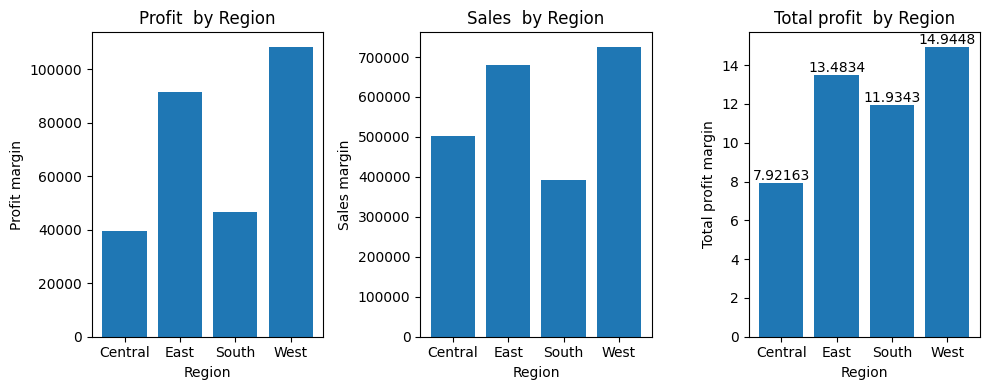

In [143]:
total_Sales_Region= df.groupby('Region')[['Sales','Profit']].sum()
total_Sales_Region['total_margin']=total_Sales_Region['Profit']/total_Sales_Region['Sales']*100

total_Sales_Region

fig,ax=plt.subplots(1,3,figsize=(10,4))

bars=ax[0].bar(total_Sales_Region.index,total_Sales_Region['Profit'])

ax[0].set_title("Profit  by Region")
ax[0].set_ylabel("Profit margin")
ax[0].set_xlabel("Region")

bars1=ax[1].bar(total_Sales_Region.index,total_Sales_Region['Sales'])

ax[1].set_title("Sales  by Region")
ax[1].set_ylabel("Sales margin")
ax[1].set_xlabel("Region")

bars2=ax[2].bar(total_Sales_Region.index,total_Sales_Region['total_margin'])

ax[2].set_title("Total profit  by Region")
ax[2].set_ylabel("Total profit margin")
ax[2].set_xlabel("Region")
ax[2].bar_label(bars2)

plt.tight_layout()

plt.show()

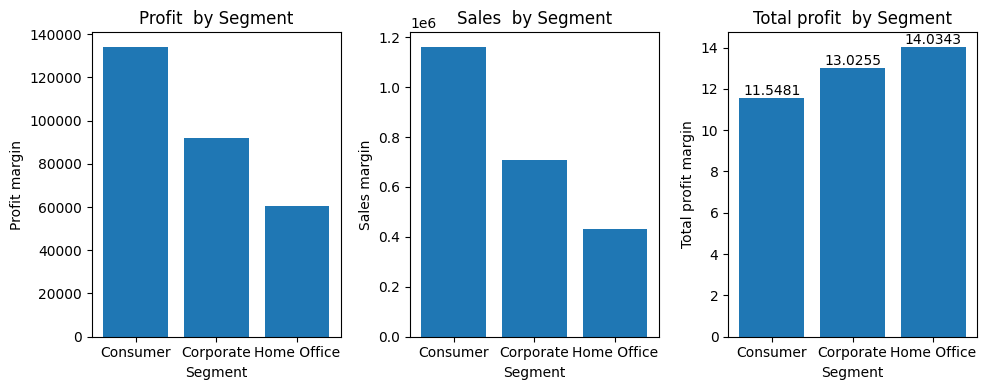

In [144]:
total_sales_by_segment= df.groupby('Segment')[['Sales','Profit']].sum()
total_sales_by_segment['total_margin']= total_sales_by_segment['Profit']/total_sales_by_segment['Sales']*100
total_sales_by_segment

fig,ax=plt.subplots(1,3,figsize=(10,4))

bars=ax[0].bar(total_sales_by_segment.index,total_sales_by_segment['Profit'])

ax[0].set_title("Profit  by Segment")
ax[0].set_ylabel("Profit margin")
ax[0].set_xlabel("Segment")

bars1=ax[1].bar(total_sales_by_segment.index,total_sales_by_segment['Sales'])

ax[1].set_title("Sales  by Segment")
ax[1].set_ylabel("Sales margin")
ax[1].set_xlabel("Segment")

bars2=ax[2].bar(total_sales_by_segment.index,total_sales_by_segment['total_margin'])

ax[2].set_title("Total profit  by Segment")
ax[2].set_ylabel("Total profit margin")
ax[2].set_xlabel("Segment")
ax[2].bar_label(bars2)

plt.tight_layout()

plt.show()

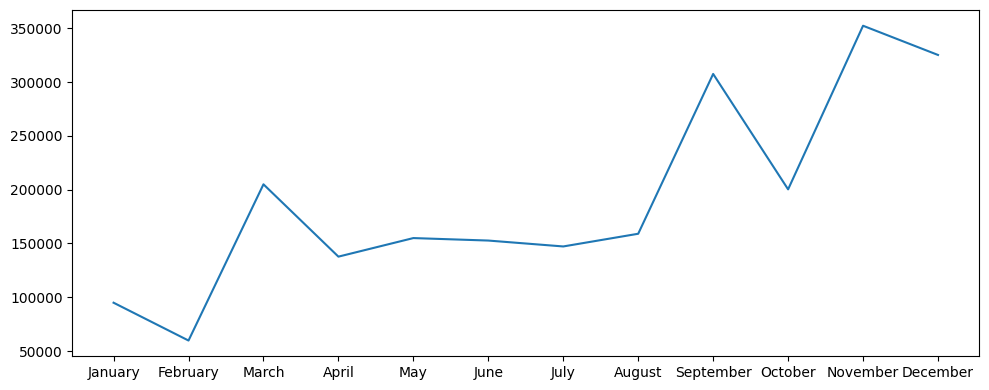

In [145]:
sales_by_month= df.groupby(['Month','Month Name'])[['Sales']].sum().reset_index().sort_values('Month')
sales_by_month

plt.figure(figsize=(10,4))
plt.plot(sales_by_month['Month Name'],sales_by_month['Sales'])
plt.tight_layout()
plt.show()

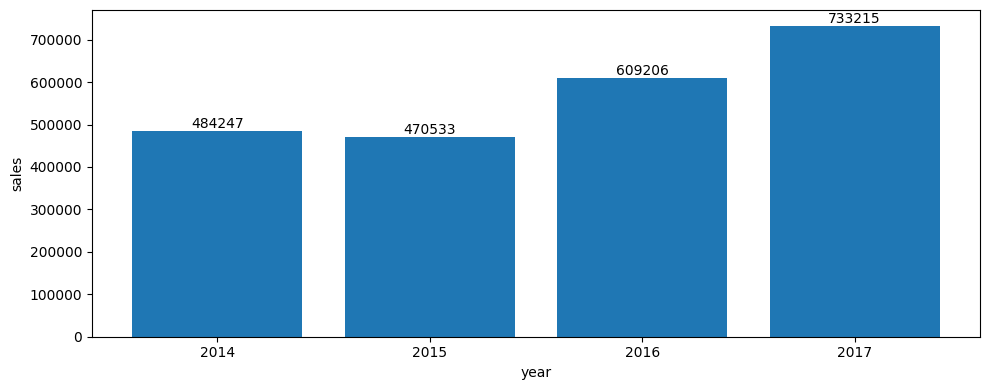

In [146]:
sales_by_year= df.groupby('Year')[['Sales']].sum()
sales_by_year

plt.figure(figsize=(10,4))
bars=plt.bar(sales_by_year.index,sales_by_year['Sales'])
plt.xlabel('year')
plt.ylabel("sales")
plt.xticks(sales_by_year.index)
plt.bar_label(bars)
plt.tight_layout()
plt.show()

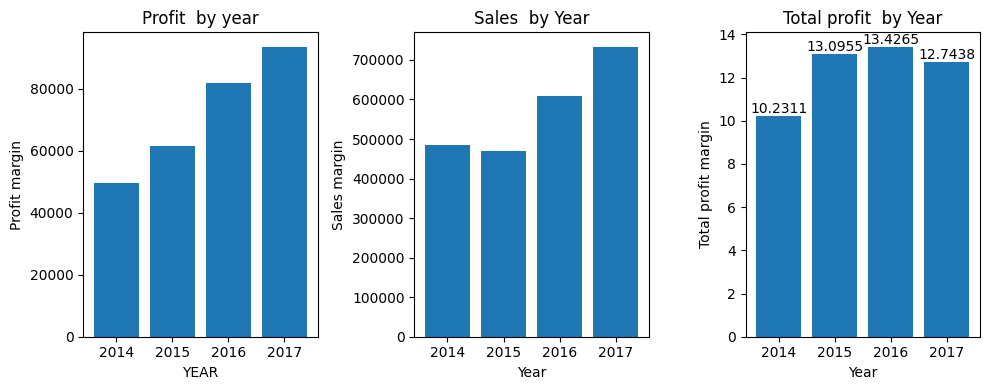

In [147]:
total_sales_by_year= df.groupby('Year')[['Sales','Profit']].sum()
total_sales_by_year['total_margin']= total_sales_by_year['Profit']/total_sales_by_year['Sales']*100
total_sales_by_year

fig,ax=plt.subplots(1,3,figsize=(10,4))

bars=ax[0].bar(total_sales_by_year.index,total_sales_by_year['Profit'])

ax[0].set_title("Profit  by year")
ax[0].set_ylabel("Profit margin")
ax[0].set_xlabel("YEAR")


bars1=ax[1].bar(total_sales_by_year.index,total_sales_by_year['Sales'])

ax[1].set_title("Sales  by Year")
ax[1].set_ylabel("Sales margin")
ax[1].set_xlabel("Year")


bars2=ax[2].bar(total_sales_by_year.index,total_sales_by_year['total_margin'])

ax[2].set_title("Total profit  by Year")
ax[2].set_ylabel("Total profit margin")
ax[2].set_xlabel("Year")
ax[2].bar_label(bars2)
plt.xticks(total_sales_by_year.index)

plt.tight_layout()

plt.show()

Business insights:

Here are all your business insights in one place — clean and ready to use in your README and Power BI dashboard.

Question 6 — Business Overview
Superstore generated $2.3M in total sales between 2014-2017 with an overall profit margin of only 12.47%, below the healthy retail benchmark of 15-30%. While revenue grew 56% from 2015 to 2017, profit margin declined from 13.43% in 2016 to 12.74% in 2017 — suggesting the business is sacrificing margin to drive volume growth.

Question 1 — Category & Sub-Category Performance
Furniture generates $742K in revenue but only 2.49% profit margin, making it the least profitable category despite high sales. Tables, Bookcases and Supplies are actively loss-making sub-categories with margins of -8.56%, -3.02% and -2.55% respectively. Office Supplies small items like Labels (44.4%), Paper (43.4%) and Envelopes (42.3%) are the highest margin sub-categories despite lower sales volume.

Question 2 — Discount Impact
Discounts above 20% consistently result in negative average profit. At 50% discount the business loses approximately $300 per order on average. The current discount strategy is a major driver of the overall low profit margin and should be restructured with a maximum discount cap.

Question 3 — Regional Performance
The Central region is the weakest performer across all metrics with only 7.92% profit margin — nearly half of the West region's 14.94%. The West leads in sales, profit and margin. Central region requires urgent strategic review to identify why it underperforms despite being a large US market.

Question 4 — Customer Segmentation
Consumer segment generates the highest absolute revenue ($1.2M) and profit ($134K) but has the lowest profit margin at 11.55%. Home Office, despite being the smallest segment by volume, is the most efficient at 14.03% margin — representing an underserved growth opportunity.

Question 5 — Seasonal Trends
Sales follow a clear seasonal pattern with January and February being the weakest months. The business surges strongly in Q4 with November being the peak month at $350K. Inventory, staffing and marketing resources should be concentrated in Q3-Q4 to maximize seasonal demand.

In [148]:
df.to_csv('superstore_cleaned.csv', index=False)

**RULE -BASED RFM (CUSTOMER SEGMENTATION)**

In [149]:
rfm=df.groupby('Customer ID').agg({'Order Date':"max",'Order ID':"count",'Sales':"sum"}).rename(columns={'Order Date':'Latest Order','Order ID':'Frequency','Sales':'Monetary'}).reset_index()
rfm


,Customer ID,Latest Order,Frequency,Monetary
0,AA-10315,2017-06-29,11,5563.560
1,AA-10375,2017-12-11,15,1056.390
2,AA-10480,2017-04-15,12,1790.512
3,AA-10645,2017-11-05,18,5086.935
4,AB-10015,2016-11-10,6,886.156
...,...,...,...,...
788,XP-21865,2017-11-17,28,2374.658
789,YC-21895,2017-12-26,8,5454.350
790,YS-21880,2017-12-21,12,6720.444
791,ZC-21910,2017-11-06,31,8025.707


In [150]:
max_date=df['Order Date'].max()


In [151]:
rfm['Recency']=max_date-rfm['Latest Order']
rfm['Recency']=rfm['Recency'].dt.days
rfm.head()


,Customer ID,Latest Order,Frequency,Monetary,Recency
0,AA-10315,2017-06-29,11,5563.560,184
1,AA-10375,2017-12-11,15,1056.390,19
2,AA-10480,2017-04-15,12,1790.512,259
3,AA-10645,2017-11-05,18,5086.935,55
4,AB-10015,2016-11-10,6,886.156,415


In [152]:
rfm['R_Score']=pd.qcut(rfm['Recency'],q=4,labels=[4,3,2,1])
rfm['F_Score']=pd.qcut(rfm['Frequency'],q=4,labels=[1,2,3,4])
rfm['M_score']=pd.qcut(rfm['Monetary'],q=4,labels=[1,2,3,4])
rfm.head()


,Customer ID,Latest Order,Frequency,Monetary,Recency,R_Score,F_Score,M_score
0,AA-10315,2017-06-29,11,5563.560,184,1,2,4
1,AA-10375,2017-12-11,15,1056.390,19,4,3,1
2,AA-10480,2017-04-15,12,1790.512,259,1,2,2
3,AA-10645,2017-11-05,18,5086.935,55,3,4,4
4,AB-10015,2016-11-10,6,886.156,415,1,1,1


In [153]:
rfm[['R_Score','F_Score','M_score']]=rfm[['R_Score','F_Score','M_score']].astype(int)


In [154]:
rfm['RFM_SCORE']=rfm['R_Score']+rfm['F_Score']+rfm['M_score']

In [155]:
rfm['Segment']=pd.cut(rfm['RFM_SCORE'],[2,4,6,9,12],labels=['Lost', 'At Risk', 'Loyal Customer', 'Champion'])

In [156]:
rfm.head()

,Customer ID,Latest Order,Frequency,Monetary,Recency,R_Score,F_Score,M_score,RFM_SCORE,Segment
0,AA-10315,2017-06-29,11,5563.560,184,1,2,4,7,Loyal Customer
1,AA-10375,2017-12-11,15,1056.390,19,4,3,1,8,Loyal Customer
2,AA-10480,2017-04-15,12,1790.512,259,1,2,2,5,At Risk
3,AA-10645,2017-11-05,18,5086.935,55,3,4,4,11,Champion
4,AB-10015,2016-11-10,6,886.156,415,1,1,1,3,Lost


In [157]:
Total_customers_per_segment=rfm.groupby('Segment').agg({'Customer ID':"count" ,'Recency':"mean",'Frequency':"mean",'Monetary':"mean"}).round(2)
Total_customers_per_segment

/tmp/ipython-input-3980596335.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Total_customers_per_segment=rfm.groupby('Segment').agg({'Customer ID':"count" ,'Recency':"mean",'Frequency':"mean",'Monetary':"mean"}).round(2)


,Customer ID,Recency,Frequency,Monetary
Segment,,,,
Lost,122,378.81,5.76,738.72
At Risk,182,164.49,8.86,1374.04
Loyal Customer,289,112.36,13.21,3357.90
Champion,200,38.95,19.30,4932.84


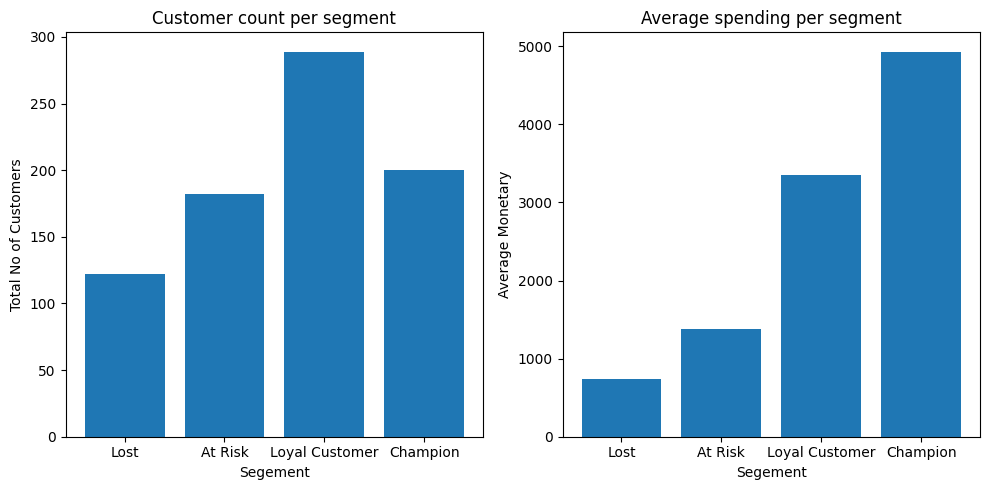

In [158]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].bar(Total_customers_per_segment.index,Total_customers_per_segment['Customer ID'])
ax[0].set_title("Customer count per segment")
ax[0].set_xlabel("Segement")
ax[0].set_ylabel("Total No of Customers")

ax[1].bar(Total_customers_per_segment.index,Total_customers_per_segment['Monetary'])
ax[1].set_title("Average spending per segment")
ax[1].set_xlabel("Segement")
ax[1].set_ylabel("Average Monetary")
plt.tight_layout()
plt.show()


Lets create extra columns to standardise the Recency,Frequency,Monetary

**ML BASED RFM — KMeans Clustering.**

In [159]:
rfm['Recency_standard']=rfm['Recency']
rfm['Frequency_standard']=rfm['Frequency']
rfm['Monetary_standard']=rfm['Monetary']


In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()

rfm_scaled=['Recency_standard','Frequency_standard','Monetary_standard']
rfm[rfm_scaled]= scaler.fit_transform(rfm[rfm_scaled])
rfm

,Customer ID,Latest Order,Frequency,Monetary,Recency,R_Score,F_Score,M_score,RFM_SCORE,Segment,Recency_standard,Frequency_standard,Monetary_standard
0,AA-10315,2017-06-29,11,5563.560,184,1,2,4,7,Loyal Customer,0.199889,-0.256912,1.015112
1,AA-10375,2017-12-11,15,1056.390,19,4,3,1,8,Loyal Customer,-0.686762,0.384256,-0.700590
2,AA-10480,2017-04-15,12,1790.512,259,1,2,2,5,At Risk,0.602912,-0.096620,-0.421139
3,AA-10645,2017-11-05,18,5086.935,55,3,4,4,11,Champion,-0.493311,0.865131,0.833680
4,AB-10015,2016-11-10,6,886.156,415,1,1,1,3,Lost,1.441199,-1.058371,-0.765391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,2017-11-17,28,2374.658,43,3,4,3,10,Champion,-0.557795,2.468049,-0.198777
789,YC-21895,2017-12-26,8,5454.350,4,4,1,4,9,Loyal Customer,-0.767367,-0.737787,0.973540
790,YS-21880,2017-12-21,12,6720.444,9,4,2,4,10,Champion,-0.740498,-0.096620,1.455492
791,ZC-21910,2017-11-06,31,8025.707,54,3,4,4,11,Champion,-0.498685,2.948925,1.952354


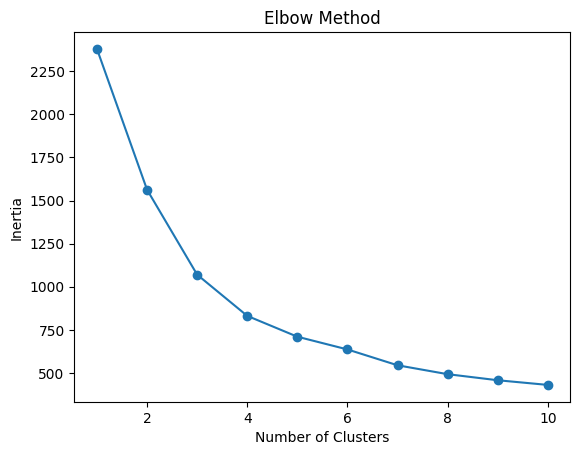

In [161]:
inertia = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm[['Recency_standard','Frequency_standard','Monetary_standard']])
    inertia.append(model.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [162]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(rfm[['Recency_standard','Frequency_standard','Monetary_standard']])
rfm['Cluster'] = model.labels_
rfm.head()

,Customer ID,Latest Order,Frequency,Monetary,Recency,R_Score,F_Score,M_score,RFM_SCORE,Segment,Recency_standard,Frequency_standard,Monetary_standard,Cluster
0,AA-10315,2017-06-29,11,5563.560,184,1,2,4,7,Loyal Customer,0.199889,-0.256912,1.015112,0
1,AA-10375,2017-12-11,15,1056.390,19,4,3,1,8,Loyal Customer,-0.686762,0.384256,-0.700590,1
2,AA-10480,2017-04-15,12,1790.512,259,1,2,2,5,At Risk,0.602912,-0.096620,-0.421139,1
3,AA-10645,2017-11-05,18,5086.935,55,3,4,4,11,Champion,-0.493311,0.865131,0.833680,0
4,AB-10015,2016-11-10,6,886.156,415,1,1,1,3,Lost,1.441199,-1.058371,-0.765391,3


In [163]:
rfm.groupby('Cluster')[['Recency_standard','Frequency_standard','Monetary_standard']].mean().round(2)

,Recency_standard,Frequency_standard,Monetary_standard
Cluster,,,
0,-0.41,0.81,0.29
1,-0.29,-0.60,-0.50
2,-0.17,1.30,2.61
3,2.13,-0.77,-0.50


In [164]:

segment={0:"Loyal Customer",1:"Risk",2:"Champion",3:"Lost"}
rfm['KMeans_segment']=rfm['Cluster'].map(segment)
rfm

,Customer ID,Latest Order,Frequency,Monetary,Recency,R_Score,F_Score,M_score,RFM_SCORE,Segment,Recency_standard,Frequency_standard,Monetary_standard,Cluster,KMeans_segment
0,AA-10315,2017-06-29,11,5563.560,184,1,2,4,7,Loyal Customer,0.199889,-0.256912,1.015112,0,Loyal Customer
1,AA-10375,2017-12-11,15,1056.390,19,4,3,1,8,Loyal Customer,-0.686762,0.384256,-0.700590,1,Risk
2,AA-10480,2017-04-15,12,1790.512,259,1,2,2,5,At Risk,0.602912,-0.096620,-0.421139,1,Risk
3,AA-10645,2017-11-05,18,5086.935,55,3,4,4,11,Champion,-0.493311,0.865131,0.833680,0,Loyal Customer
4,AB-10015,2016-11-10,6,886.156,415,1,1,1,3,Lost,1.441199,-1.058371,-0.765391,3,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,2017-11-17,28,2374.658,43,3,4,3,10,Champion,-0.557795,2.468049,-0.198777,0,Loyal Customer
789,YC-21895,2017-12-26,8,5454.350,4,4,1,4,9,Loyal Customer,-0.767367,-0.737787,0.973540,1,Risk
790,YS-21880,2017-12-21,12,6720.444,9,4,2,4,10,Champion,-0.740498,-0.096620,1.455492,0,Loyal Customer
791,ZC-21910,2017-11-06,31,8025.707,54,3,4,4,11,Champion,-0.498685,2.948925,1.952354,2,Champion


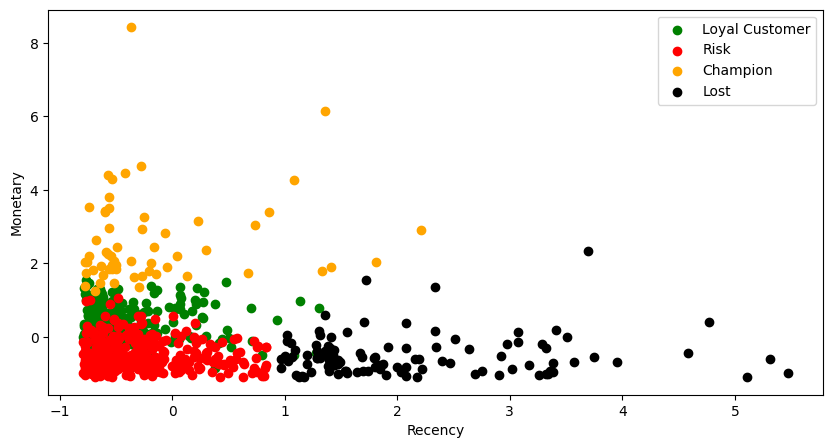

In [165]:
plt.figure(figsize=(10,5))
segments = {
    "Loyal Customer": "green",
    "Risk": "red",
    "Champion": "orange",
    "Lost": "black"
}

for segment, color in segments.items():
    subset = rfm[rfm['KMeans_segment'] == segment]
    plt.scatter(subset['Recency_standard'], subset['Monetary_standard'], color=color, label=segment)

plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.legend()
plt.show()





*   Champions (200 customers):
Bought only 39 days ago on average, purchased 19 times, spent $4,932 on average.
These are your best customers — recent, frequent, high spenders. Protect them at all costs.


*  Loyal Customers (289 customers):
Bought 112 days ago, 13 purchases, spent $3,358. Solid customers who just need a nudge to become Champions. A loyalty reward program would work perfectly here.

*   At Risk (182 customers):
Bought 164 days ago, only 9 purchases, spent $1,374. These customers are drifting away. They used to buy but haven't recently. A win-back campaign — discount offer, personalized email — could recover them.

*   Lost (122 customers):
Bought 379 days ago on average — over a year. Only 6 purchases, spent $739. These customers have likely moved to a competitor. Very hard to recover.

In [166]:
rfm_export = rfm[['Customer ID', 'Recency',
'Frequency', 'Monetary', 'Segment', 'KMeans_segment']]
rfm.to_csv('rfm_segments.csv', index=False)

 Sales Forecasting with Facebook Prophet

In [167]:
!pip install prophet

In [168]:
sales_forecast=df.groupby('Order Date')['Sales'].sum().reset_index()
sales_forecast.rename(columns={'Order Date':"ds",'Sales':'y'},inplace=True)
sales_forecast.head()

,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


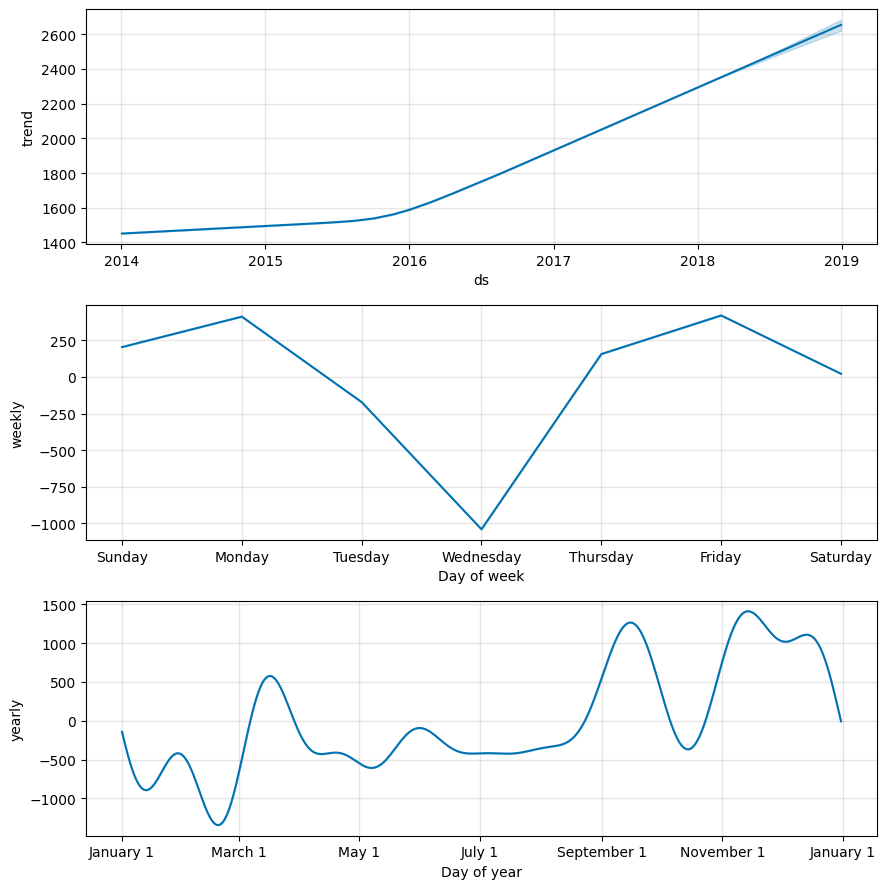

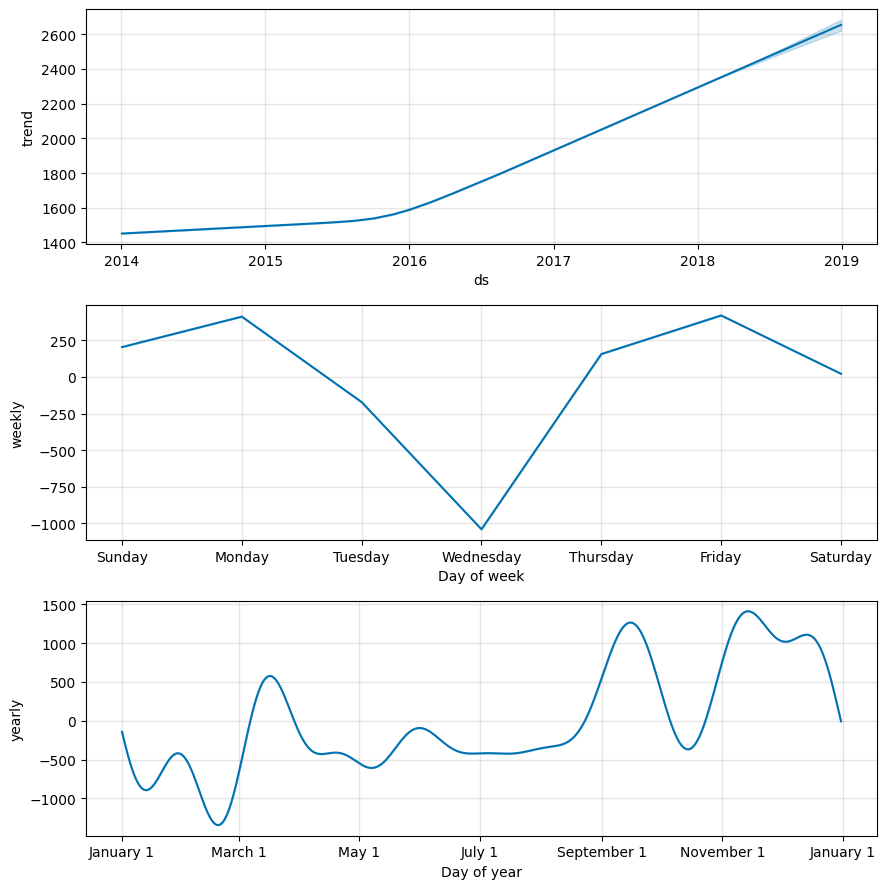

In [169]:
from prophet import Prophet
model=Prophet()
model.fit(sales_forecast)
future_dataset=model.make_future_dataframe(periods=365)
future_forecast=model.predict(future_dataset)
model.plot_components(future_forecast)

Prophet time series forecasting projects daily sales to grow from $1,400 in 2014 to $2,600+ by 2019, confirming strong business momentum. Weekly analysis reveals Wednesday as the weakest sales day (-$1,000 below average) while yearly seasonality confirms Q4 as the peak revenue period — consistent with manual analysis findings."